# Image Processing 101

Simple examples of image processing concepts on OpenCV. Concepts explored:

* Data structures
* Color and color conversions
* Thresholding and masking
* Histogram equalization
* Background subtraction
* Blurring
* Contours and bounding rectangles
* Edges
* Hough Transforms

In [163]:
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

---

## Basic data structures in OpenCV

In [164]:
# read an image
img = cv2.imread('images/nebula.jpg')

# show image format (basically a 3-d array of pixel color info, in BGR format)
print(img)

[[[ 24   9  13]
  [ 23   8  12]
  [ 22   7  11]
  ..., 
  [ 75  52   4]
  [ 74  51   3]
  [ 73  50   2]]

 [[ 23   8  12]
  [ 22   7  11]
  [ 22   7  11]
  ..., 
  [ 74  51   3]
  [ 73  50   2]
  [ 72  49   1]]

 [[ 21   6  10]
  [ 21   6  10]
  [ 21   6  10]
  ..., 
  [ 72  49   1]
  [ 72  49   1]
  [ 71  48   0]]

 ..., 
 [[ 32   7   3]
  [ 31   6   2]
  [ 31   6   2]
  ..., 
  [101  77   1]
  [101  77   1]
  [101  77   1]]

 [[ 29   4   0]
  [ 29   4   0]
  [ 31   6   2]
  ..., 
  [101  77   1]
  [100  76   0]
  [100  76   0]]

 [[ 29   4   0]
  [ 29   4   0]
  [ 31   6   2]
  ..., 
  [101  77   1]
  [100  76   0]
  [100  76   0]]]


### Colors and color conversions

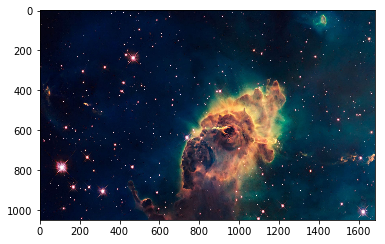

In [165]:
# convert image to RGB color for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show image with matplotlib
plt.imshow(img)

In [166]:
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# grayscale image represented as a 2-d array
print(gray_img)

[[12 11 10 ..., 40 39 38]
 [11 10 10 ..., 39 38 37]
 [ 9  9  9 ..., 37 37 36]
 ..., 
 [ 9  8  8 ..., 57 57 57]
 [ 6  6  8 ..., 57 56 56]
 [ 6  6  8 ..., 57 56 56]]


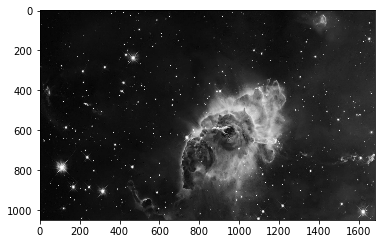

In [167]:
# have to convert grayscale back to RGB for plt.imshow()
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))

### Finding the average color of an image

In [168]:
# find average per row
# np.average() takes in an axis argument which finds the average across that axis. 
average_color_per_row = np.average(img, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0)

# convert back to uint8
average_color = np.uint8(average_color)
print(average_color)


[25 40 58]


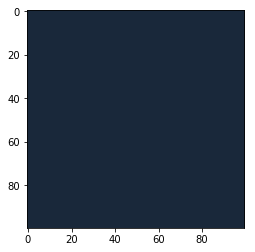

In [169]:
# create 100 x 100 pixel array with average color value
average_color_img = np.array([[average_color]*100]*100, np.uint8)

plt.imshow(average_color_img)

---

## Binary thresholding

Examples using thresholding on brightness/darkness of grayscale image and on color ranges


### Binary thresholding on grayscale image

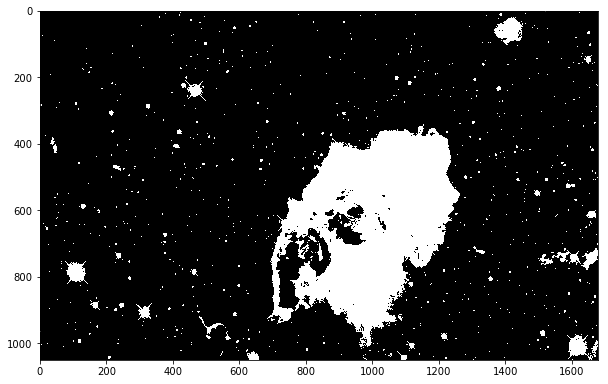

In [170]:
# threshold for grayscale image
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
cv2.imwrite('output/nebula_binarythres.jpg',threshold_img)
plt.figure(figsize=(10,10))
plt.imshow(threshold_img)

### Binary thresholding on color

In [171]:
# open new Mondrian Piet painting photo
piet = cv2.imread('images/piet.png')
piet_hsv = cv2.cvtColor(piet, cv2.COLOR_BGR2HSV)

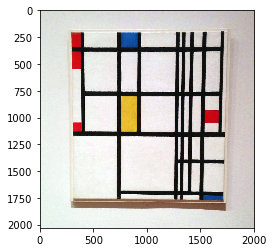

In [172]:
plt.imshow(cv2.cvtColor(piet, cv2.COLOR_BGR2RGB))

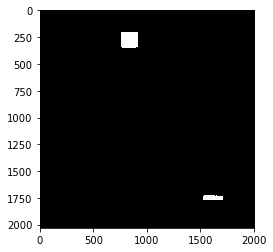

In [173]:
# threshold for hue channel in blue range
blue_min = np.array([85, 60, 60], np.uint8)
blue_max = np.array([150, 255, 255], np.uint8)
threshold_blue_img = cv2.inRange(piet_hsv, blue_min, blue_max)

# show threshold bits
threshold_blue_img = cv2.cvtColor(threshold_blue_img, cv2.COLOR_GRAY2RGB)
plt.imshow(threshold_blue_img)

### Using binary thresholding to obtain an image mask

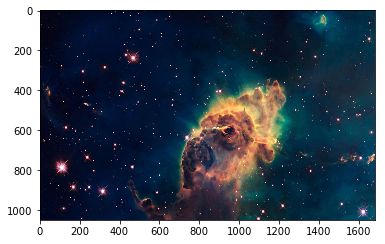

In [174]:
nebula = cv2.imread('images/nebula.jpg')
nebula_hsv = cv2.cvtColor(nebula, cv2.COLOR_BGR2HSV)

plt.imshow(cv2.cvtColor(nebula_hsv, cv2.COLOR_HSV2RGB))

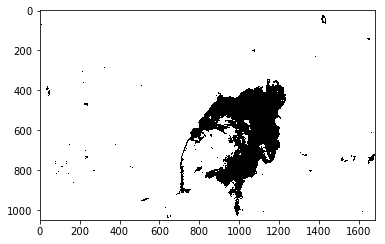

In [175]:
orange_min = np.array([0, 0, 0], np.uint8)
orange_max = np.array([60, 255, 255], np.uint8)
mask_inverse = cv2.inRange(nebula_hsv, orange_min, orange_max)
mask = cv2.bitwise_not(mask_inverse)
cv2.imwrite('output/nebula_mask.jpg',mask)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

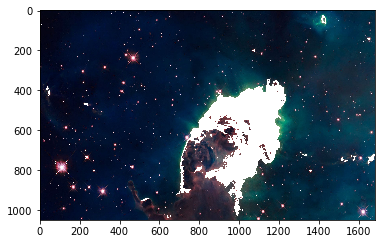

In [176]:
# convert single channel mask back into 3 channels
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# perform bitwise and on mask to obtain cut-out image that is not reds-oranges
masked_nebula = cv2.bitwise_and(nebula, mask_rgb)

# replace the cut-out parts with white
masked_replace_white = cv2.addWeighted(masked_nebula, 1, \
                                       cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)
cv2.imwrite('output/nebula_mask_replace_white.jpg',masked_replace_white)
plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))

---
## Histogram equalization

### Contrast Limited Adaptive Histogram Equalization (CLAHE)

Using CLAHE to bring out image contrast

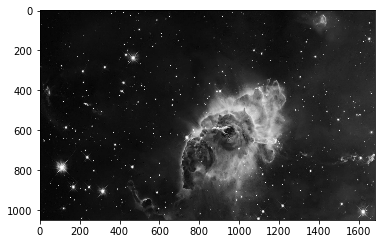

In [177]:
# First, create the image in greyscale, and create the CLAHE object
nebula_gray = cv2.cvtColor(nebula, cv2.COLOR_BGR2GRAY)
cv2.imwrite('output/nebula_gray.jpg',nebula_gray)
plt.imshow(cv2.cvtColor(nebula_gray, cv2.COLOR_GRAY2RGB))

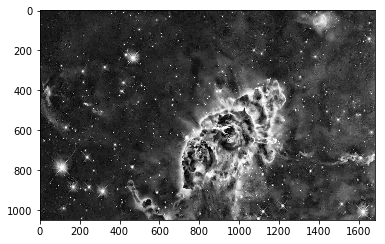

In [178]:
clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(20,20))
cl1 = clahe.apply(nebula_gray)
cv2.imwrite('output/nebula_clahe.jpg',cl1)
plt.imshow(cv2.cvtColor(cl1, cv2.COLOR_GRAY2RGB))

## Noise reduction

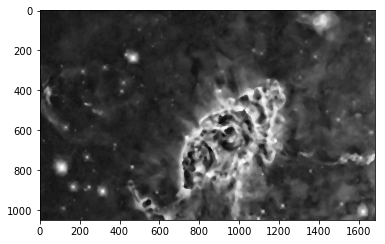

In [179]:
# Apply a median filter to CLAHE stretch
nebula_median = cv2.medianBlur ( cl1, 15 )
cv2.imwrite('output/nebula_median.jpg',nebula_median)
plt.imshow(cv2.cvtColor(nebula_median, cv2.COLOR_GRAY2RGB))

---

## Background extraction
Here, we display a flow with seeding particles (polystyrene balls with weights).

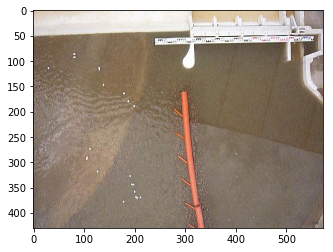

In [180]:
ptvweir = cv2.imread('images/ptvweir_color.jpg')
plt.imshow(cv2.cvtColor(ptvweir, cv2.COLOR_BGR2RGB))

And then convert to grayscale

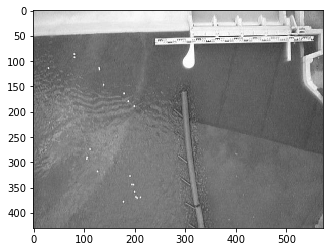

In [181]:
ptvweir_gray = cv2.cvtColor(ptvweir, cv2.COLOR_RGB2GRAY)
plt.imshow(cv2.cvtColor(ptvweir_gray, cv2.COLOR_GRAY2RGB))

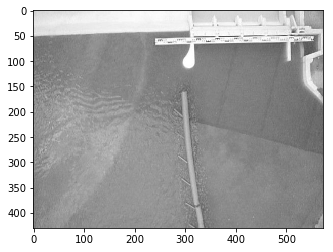

In [182]:
# Here, there is already a background grayscale image (have to load it as grayscale still)
ptvweir_back = cv2.cvtColor(cv2.imread('images/ptvweir_back.jpg'), cv2.COLOR_RGB2GRAY)
plt.imshow(cv2.cvtColor(ptvweir_back, cv2.COLOR_GRAY2RGB))

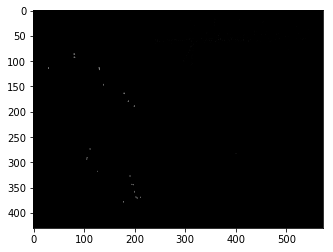

In [183]:
# Now, lets subtract the two images and plot the result
ptvweir_subtract = cv2.subtract(ptvweir_gray,ptvweir_back)
cv2.imwrite('output/ptvweir_subtract.jpg',ptvweir_subtract)
plt.imshow(cv2.cvtColor(ptvweir_subtract, cv2.COLOR_GRAY2RGB))

---

## Blurring

### Gaussian Blur

Gaussian blurring in action, and how it makes a difference in the binary image that it produces

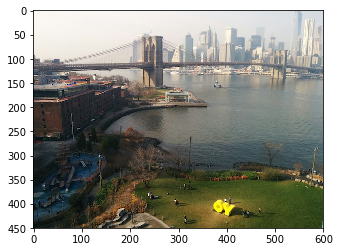

In [184]:
img = cv2.imread('images/oy.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


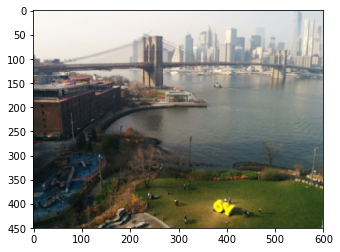

In [185]:
# preproccess with blurring, with 5x5 kernel
img_blur_small = cv2.GaussianBlur(img, (5,5), 0)
cv2.imwrite('output/oy-gaussian-blur-5.jpg', img_blur_small)
plt.imshow(cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB))

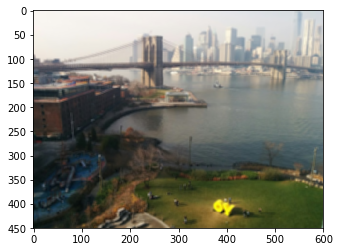

In [186]:
img_blur_small = cv2.GaussianBlur(img, (5,5), 25)
cv2.imwrite('output/oy-gaussian-blur-5-3.jpg', img_blur_small)
plt.imshow(cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB))

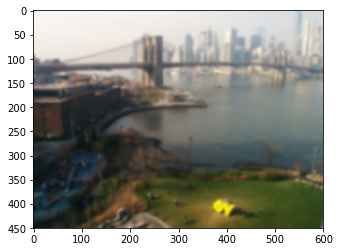

In [187]:
img_blur_large = cv2.GaussianBlur(img, (15,15), 0)
cv2.imwrite('output/oy-gaussian-blur-15.jpg', img_blur_large)
plt.imshow(cv2.cvtColor(img_blur_large, cv2.COLOR_BGR2RGB))

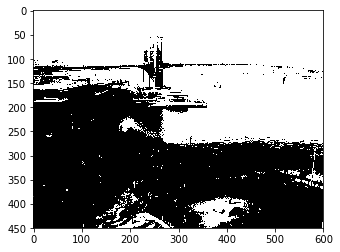

In [188]:
# threshold on regular image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold_img = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)
cv2.imwrite('output/oy-no-blur-thresh.jpg', threshold_img)

plt.imshow(cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB))

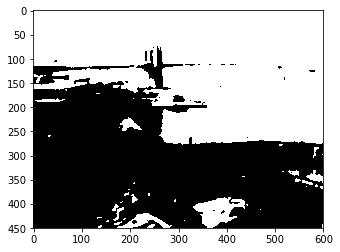

In [189]:
#threshold on blurred image
gray_blur_img = cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2GRAY)
_, threshold_img_blur = cv2.threshold(gray_blur_img, 100, 255, cv2.THRESH_BINARY)
cv2.imwrite('output/oy-gaussian-blur-5-thresh.jpg', threshold_img_blur)
plt.imshow(cv2.cvtColor(threshold_img_blur, cv2.COLOR_GRAY2RGB))

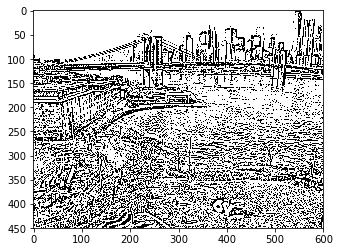

In [190]:
# using adaptive threshold instead of global
adaptive_thresh = cv2.adaptiveThreshold(gray_img,255,\
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                                         cv2.THRESH_BINARY,11,2)
plt.imshow(cv2.cvtColor(adaptive_thresh, cv2.COLOR_GRAY2RGB))

---

## Contour and bounding boxes

True

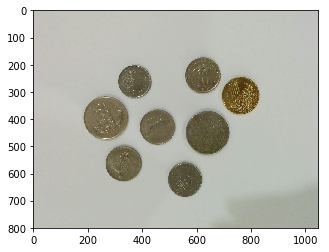

In [191]:
coins = cv2.imread('images/coins.jpg')
plt.imshow(cv2.cvtColor(coins, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/coins-orig.jpg', coins)

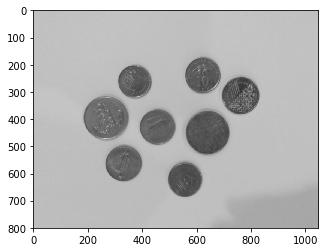

In [192]:
# get binary image and apply Gaussian blur
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, (5, 5), 0)

plt.imshow(cv2.cvtColor(coins_preprocessed, cv2.COLOR_GRAY2RGB))

True

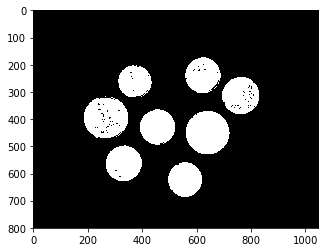

In [193]:
_, coins_binary = cv2.threshold(coins_preprocessed, 130, 255, cv2.THRESH_BINARY)

# invert image to get coins
coins_binary = cv2.bitwise_not(coins_binary)
plt.imshow(cv2.cvtColor(coins_binary, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/coins-binary.png', coins_binary)

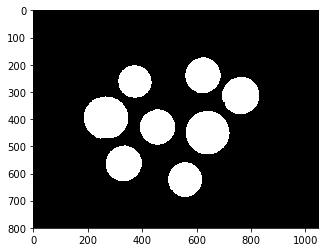

In [194]:
# morph coins by eroding and dilating to remove noise
morph_kernel = np.ones((15,15),np.uint8)
coins_morph = cv2.morphologyEx(coins_binary, cv2.MORPH_CLOSE, morph_kernel)

plt.imshow(cv2.cvtColor(coins_morph, cv2.COLOR_GRAY2RGB))

---
### Get countours

number of coins: 8


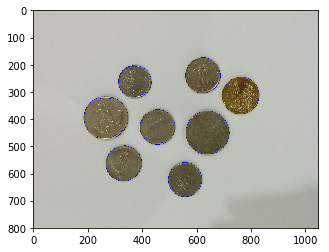

In [195]:
# find contours
coins_contours, _ = cv2.findContours(coins_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# make copy of image
coins_and_contours = np.copy(coins)

# find contours of large enough area
min_coin_area = 60
large_contours = [cnt for cnt in coins_contours if cv2.contourArea(cnt) > min_coin_area]

# draw contours
cv2.drawContours(coins_and_contours, large_contours, -1, (255,0,0))

plt.imshow(cv2.cvtColor(coins_and_contours, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/coins-contour.jpg', coins_and_contours)

# print number of contours
print('number of coins: %d' % len(large_contours))

### Find bounding boxes

True

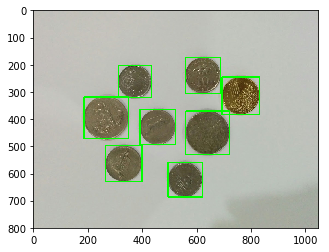

In [196]:
# create copy of image to draw bounding boxes
bounding_img = np.copy(coins)

# for each contour find bounding box and draw rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(bounding_img, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/coins-bounding.jpg', bounding_img)

## Edge detection
Canny edge detector on OpenCV. Usage of edge detection versus thresholding to obtain binary image.

True

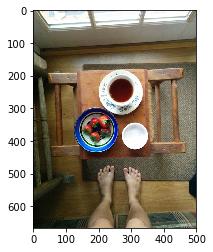

In [197]:
cups = cv2.imread('images/cups.jpg')
plt.imshow(cv2.cvtColor(cups, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/cups-orig.jpg', cups)

In [198]:
# preprocess by blurring and grayscale
cups_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(cups, (7,7), 0), cv2.COLOR_BGR2GRAY)

True

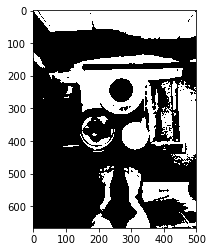

In [199]:
# find binary image with thresholding
low_thresh = 120
high_thresh = 200
_, cups_thresh = cv2.threshold(cups_preprocessed, low_thresh, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(cups_thresh, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/cups-thresh-low.png', cups_thresh)

_, cups_thresh_hi = cv2.threshold(cups_preprocessed, high_thresh, 255, cv2.THRESH_BINARY)
cv2.imwrite('output/cups-thresh-hi.png', cups_thresh_hi)

True

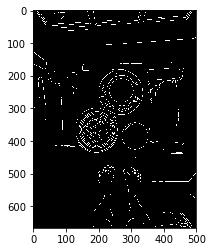

In [200]:
# find binary image with edges
cups_edges = cv2.Canny(cups_preprocessed, threshold1=90, threshold2=110)
plt.imshow(cv2.cvtColor(cups_edges, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/cups-edges.png', cups_edges)

---

## Hough Transform 

Example of using cv2.HoughCircles and cv2.HoughLines to detect circles and lines on an image

number of circles detected: 3


True

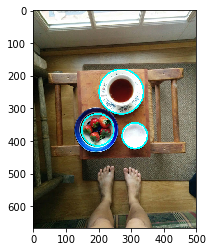

In [201]:
# find hough circles
circles = cv2.HoughCircles(cups_edges, cv2.cv.CV_HOUGH_GRADIENT, dp=1.5, minDist=50, minRadius=20, maxRadius=130)
cups_circles = np.copy(cups)

# if circles are detected, draw them
if circles is not None and len(circles) > 0:
    for (x, y, r) in circles[0]:
        x, y, r = int(x), int(y), int(r)
        cv2.circle(cups_circles, (x, y), r, (255, 255, 0), 4)
    plt.imshow(cv2.cvtColor(cups_circles, cv2.COLOR_BGR2RGB))

print('number of circles detected: %d' % len(circles[0]))
cv2.imwrite('output/cups-circles.jpg', cups)

True

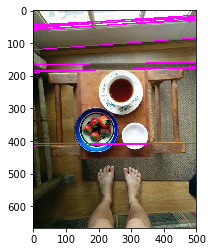

In [202]:
# line detection

# copy of image to draw lines
cups_lines = np.copy(cups)

# find hough lines
num_pix_threshold = 110 # minimum number of pixels that must be on a line
lines = cv2.HoughLines(cups_edges, 1, np.pi/180, num_pix_threshold)

for rho, theta in lines[0]:
    # convert line equation into start and end points of line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho 
    y0 = b * rho 

    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))

    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(cups_lines, (x1,y1), (x2,y2), (255,0,255), 2)
plt.imshow(cv2.cvtColor(cups_lines, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/cups-lines.jpg', cups_lines)


## Using Canny edge detection and Houghs to find speficic lines

True

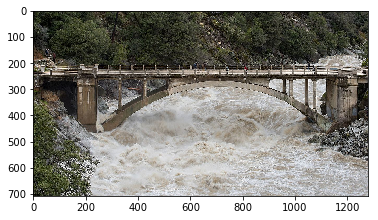

In [203]:
# line detection for Yuba River
yuba = cv2.imread('images/yubariver.jpg')
#yuba = cv2.imread('images/boneyard.png')
plt.imshow(cv2.cvtColor(yuba, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/yuba-orig.jpg', yuba)

True

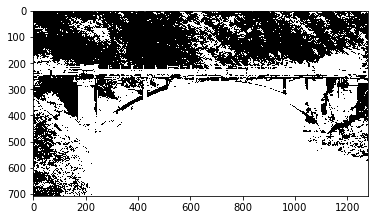

In [204]:
# preprocess by blurring and grayscale
yuba_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(yuba, (3,3), 0), cv2.COLOR_BGR2GRAY)

# find binary image with thresholding. Use some basic stats to estimate the thresholds
sigma = 0.33
v = np.median(yuba_preprocessed)
low_thresh = int(max(0, (1.0 - sigma) * v))
high_thresh = int(min(255, (1.0 + sigma) * v))
_, yuba_thresh = cv2.threshold(yuba_preprocessed, low_thresh, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(yuba_thresh, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/yuba-thresh-low.png', yuba_thresh)

True

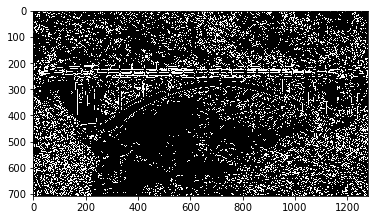

In [205]:
_, yuba_thresh_hi = cv2.threshold(yuba_preprocessed, high_thresh, 255, cv2.THRESH_BINARY)
cv2.imwrite('output/yuba-thresh-hi.png', yuba_thresh_hi)

# find binary image with edges
yuba_edges = cv2.Canny(yuba_preprocessed, low_thresh, high_thresh)
plt.imshow(cv2.cvtColor(yuba_edges, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/yuma-edges.png', yuba_edges)

True

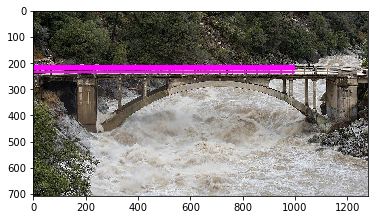

In [206]:
# find hough lines
# copy of image to draw lines
yuba_lines = np.copy(yuba)
num_pix_threshold = 600 # minimum number of pixels that must be on a line
lines = cv2.HoughLines(yuba_edges, 1, np.pi/180, num_pix_threshold)

for rho, theta in lines[0]:
    # convert line equation into start and end points of line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho 
    y0 = b * rho 

    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))

    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(yuba_lines, (x1,y1), (x2,y2), (255,0,255), 2)
plt.imshow(cv2.cvtColor(yuba_lines, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/yuba-lines.jpg', yuba_lines)

True

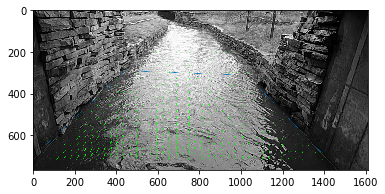

In [207]:
# line detection for Boneyard Creek
bone = cv2.imread('images/boneyard.png')
plt.imshow(cv2.cvtColor(bone, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/bone-orig.jpg', yuba)

In [ ]:
# Create mask so only channel right is analyzed


True

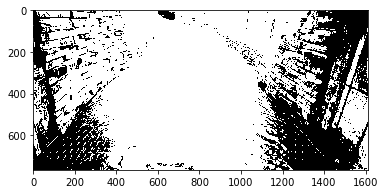

In [214]:
# preprocess by blurring and grayscale
bone_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(bone, (5,5), 0), cv2.COLOR_BGR2GRAY)

# find binary image with thresholding. Use some basic stats to estimate the thresholds
sigma = 0.5
v = np.median(bone_preprocessed)
low_thresh = int(max(0, (1.0 - sigma) * v))
high_thresh = int(min(255, (1.0 + sigma) * v))
_, bone_thresh = cv2.threshold(bone_preprocessed, low_thresh, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(bone_thresh, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/bone-thresh-low.png', bone_thresh)

True

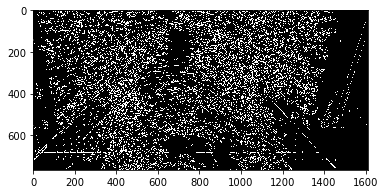

In [215]:
_, bone_thresh_hi = cv2.threshold(bone_preprocessed, high_thresh, 255, cv2.THRESH_BINARY)
cv2.imwrite('output/yuba-thresh-hi.png', bone_thresh_hi)

# find binary image with edges
bone_edges = cv2.Canny(bone_preprocessed, low_thresh, high_thresh)
plt.imshow(cv2.cvtColor(bone_edges, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/bone-edges.png', bone_edges)

True

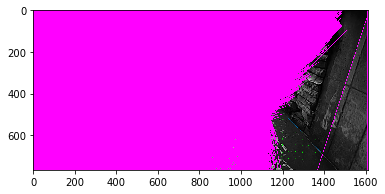

In [219]:
# find hough lines
# copy of image to draw lines
bone_lines = np.copy(bone)
num_pix_threshold = 200 # minimum number of pixels that must be on a line
lines = cv2.HoughLines(bone_edges, 1, np.pi/180, num_pix_threshold)

for rho, theta in lines[0]:
    # convert line equation into start and end points of line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho 
    y0 = b * rho 

    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))

    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(bone_lines, (x1,y1), (x2,y2), (255,0,255), 2)
plt.imshow(cv2.cvtColor(bone_lines, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/bone-lines.jpg', bone_lines)

In [211]:
print('The end!')

The end!
